### Link to git repository:
https://github.com/mbrochlips/CSS_project2 #????????

### Contributions:
| Name               | Part 1 | Part 2 | Part 3 |
|--------------------|--------|--------|--------|
| Mikkel (s234860)   | 40%    | 30%    | 30%    |
| Katinka (s235058)  | 30%    | 30%    | 40%    |
| Marcus (s234816)   | 30%    | 40%    | 30%    |

## Part 1: Properties of the real-world network of Computational Social Scientists

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx

In [2]:
df_A = pd.read_csv("data/author_edgelist.csv")

### 1. Random Network

Calculate the probability (p) ref[Section 3.2, equation (3.2) in Network Science, Albert-Laszlo Barabasi]

In [3]:
G = nx.Graph()

edges = [(row['author_1'], row['author_2'], row['weight']) for index, row in df_A.iterrows()]

G.add_weighted_edges_from(edges)

N = G.number_of_nodes()
L_average = G.number_of_edges() #we only have one network, so the average is simply number of edges

p = L_average / ((N*(N-1))/2) 

p

0.0004608281457862164

After finding p, figure out the average degree (using the given formula)

In [5]:
# The average degree:

k = p*(N-1)
k # which is the average degree for a node in the network.

6.523944059895466

Now, write a function to generate a Random Network that mirrors the Computational Social Scientists network in terms of node count, using your calculated p. Generate a random network by linking nodes in every possible pair with probability

In [ ]:
def random_network(N,p):
    
    #Start with N isolated nodes.
    R = nx.Graph()
    R.add_nodes_from(range(N))

    #Select a node pair and generate a random number between 0 and 1
    for u in range(N):
        for v in range(u+1,N):
            if np.random.rand() < p: #If the number exceeds p:
                R.add_edge(u,v) #connect the selected node pair with a link, otherwise leave them disconnected.
    return R

F = random_network(N,p)

Visualize the network as you did for the Computational Social Scientists network

In [ ]:
# We add the country_code attribute to color-code the nodes

G = nx.Graph()
edges = [(row['author_1'], row['author_2'], row['weight']) for index, row in df_A.iterrows()]
G.add_weighted_edges_from(edges)

df_country = pd.read_csv("data/all_authors_from_graph.csv")
country_dict = dict(zip(df_country["id"], df_country["country_code"]))
nx.set_node_attributes(G, {k: (v if pd.notna(v) and v else "Unknown") for k, v in country_dict.items()}
                       , "group")

In [ ]:
import netwulf
G_components = nx.connected_components(G)
largest_component = max(G_components, key=len)
G_giant = G.subgraph(largest_component)

netwulf.visualize(network = G_giant,
                  plot_in_cell_below=True,
                    config = {"zoom": 0.6,
                        "node_charge": -45,
                        "node_gravity": 0.1517613326051338,
                        "link_distance": 12.469395139268158,
                        "link_distance_variation": 0.16,
                        "node_collision": True,
                        "wiggle_nodes": False,
                        "freeze_nodes": False,
                        "node_fill_color": "#798caa",
                        "node_stroke_color": "#555555",
                        "node_label_color": "#000000",
                        "node_size": 50,
                        "node_stroke_width": 0.2942381212452212,
                        "node_size_variation": 0.5077143637356636,
                        "display_node_labels": False,
                        "scale_node_size_by_strength": True,
                        "link_color": "#7c7c7c",
                        "link_width": 2.7268712452211905,
                        "link_alpha": 0.5012971054068814,
                        "link_width_variation": 0.4814991807755325,
                        "display_singleton_nodes": True,
                        "min_link_weight_percentile": 0,
                        "max_link_weight_percentile": 1})

# unfortunately we were unable to add a legend for the country codes

/opt/anaconda3/envs/02467CSS/lib/python3.11/site-packages/networkx/readwrite/json_graph/node_link.py:142: FutureWarning: 
The default value will be `edges="edges" in NetworkX 3.6.

To make this warning go away, explicitly set the edges kwarg, e.g.:

  nx.node_link_data(G, edges="links") to preserve current behavior, or
  nx.node_link_data(G, edges="edges") for forward compatibility.
  warnings.warn(


(None, None)

In [ ]:
F_components = nx.connected_components(F)
largest_component = max(F_components, key=len)
F_giant = F.subgraph(largest_component)

netwulf.visualize(network = F_giant,
                  plot_in_cell_below=True,
                    config = {
                    "zoom": 0.6,
                    "node_charge": -62.97788093937739,
                    "node_gravity": 0.1604997269251775,
                    "link_distance": 12.033349262697978,
                    "link_distance_variation": 0.16,
                    "node_collision": True,
                    "wiggle_nodes": False,
                    "freeze_nodes": False,
                    "node_fill_color": "#798caa",
                    "node_stroke_color": "#555555",
                    "node_label_color": "#000000",
                    "node_size": 50,
                    "node_stroke_width": 0.2942381212452212,
                    "node_size_variation": 2.2641316220644456,
                    "display_node_labels": False,
                    "scale_node_size_by_strength": True,
                    "link_color": "#7c7c7c",
                    "link_width": 1.9406779082468593,
                    "link_alpha": 0.08185417804478427,
                    "link_width_variation": 0.1669169852539596,
                    "display_singleton_nodes": True,
                    "min_link_weight_percentile": 0,
                    "max_link_weight_percentile": 1})

(None, None)

In [ ]:
Ng = F_giant.number_of_nodes()
print(f"Ng = {Ng}, N = {N}")

Ng = 14122, N = 14158


np.float64(9.558035114334135)

#### Discussion:
- *What regime does your random network fall into? Is it above or below the critical threshold?
According to the textbook, what does the network's structure resemble in this regime?*

_<k_> is approximately 6.5, which exceeds the critical threshold of _<k_> = 1. This means the network is in the supercritical regime, where a giant component emerges, forming a structure with loops and cycles. In this regime, the network resembles a dense “hairball”, indicating that it is nearly fully connected, with only a few nodes remaining outside the giant component as N_g approaches the size of N.


- *Based on your visualizations, identify the key differences between the actual and the random networks. Explain whether these differences are consistent with theoretical expectations.*

When analyzing the CSS network, we observe that a few nodes have a very high degree, while many others have a degree below _<k_>. As shown in the plot below, the network follows a heavy-tailed degree distribution, which aligns with our initial expectations for scientific collaboration networks (Table 3.1, Network Science, Albert-László Barabási).

In contrast, the random network follows a binomial distribution, forming a bell-shaped curve centered around _<k_> = 6.5. This behavior can be confirmed in the plot below.

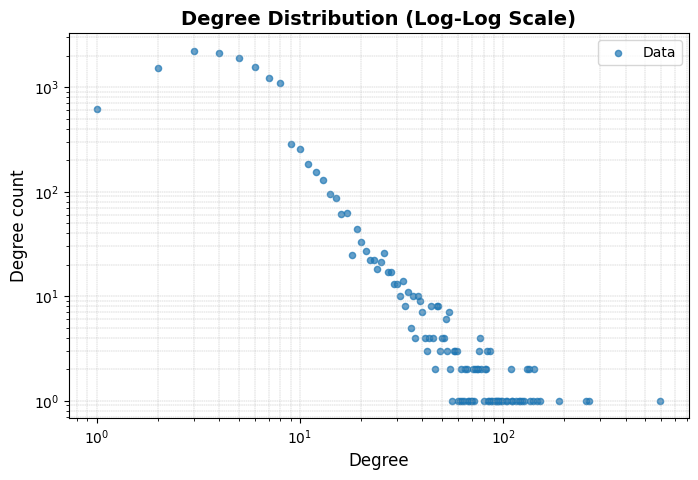

In [ ]:
degree_dict = dict(G.degree())
unique_degrees, counts = np.unique(list(degree_dict.values()), return_counts=True)

# Plot log-log scatter
plt.figure(figsize=(8, 5))
plt.scatter(unique_degrees, counts, s=20, alpha=0.7, label="Data")  # Scatter plot

# Set log scales
plt.xscale("log")
plt.yscale("log")

# Labels and title
plt.xlabel("Degree", fontsize=12)
plt.ylabel("Degree count", fontsize=12)
plt.title("Degree Distribution: CSS (Log-Log Scale)", fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.3)

# Show plot
plt.show()

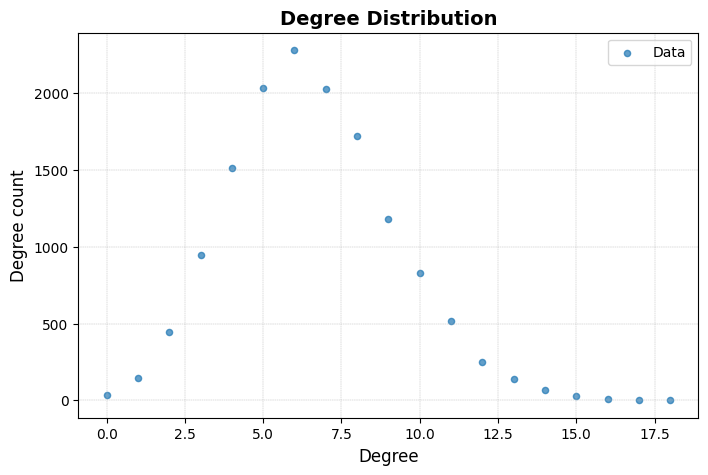

In [ ]:
degree_dict = dict(F.degree())
unique_degrees, counts = np.unique(list(degree_dict.values()), return_counts=True)

# Plot log-log scatter
plt.figure(figsize=(8, 5))
plt.scatter(unique_degrees, counts, s=20, alpha=0.7, label="Data")  # Scatter plot

# Labels and title
plt.xlabel("Degree", fontsize=12)
plt.ylabel("Degree count", fontsize=12)
plt.title("Degree Distribution: Random", fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.3)

# Show plot
plt.show()

### 2. Shortest Paths

In [ ]:
# Begin by identifying the largest connected component within the Computational Social Scientists network
# - this was calculated just before as G_giant and F_giant

# Calculate the average (unweighted) shortest path length within this giant:
shortest_G = nx.average_shortest_path_length(G_giant,None)
shortest_F = nx.average_shortest_path_length(F_giant,None)


In [ ]:
print(f"Average shortest path length for the giant in the random network: {shortest_F}")
print(f"Average shortest path lenght for the giant in CSS-network: {shortest_G}")

Average shortest path length for the giant in the random network: 5.302305299691908
Average shortest path lenght for the giant in CSS-network: 6.154703885601157


#### Discussion:
- *Why do you think I asked you to consider the giant component only?*

In the giant component, we expect to find the longest shortest paths, making it particularly relevant when investigating the small-world property. If we also consider the small components, we risk finding very small components with very short shortest paths, which would make it hard to tell if the average was low because of small components or actually short paths in the large component.

- *Why do you think I asked you to consider unweighted edges?*

The weights represent how many links the scientists have in terms of common papers. Therefore, they actually resemble some measure of connectedness and would be misleading to include in the search for the average shortest path.

- *Does the Computational Social Scientists network exhibit the small-world phenomenon?*

The CSS network has an average shortest path of 6.15, which means that, on average, there is a maximum of around six links between two scientists. This is not unexpectedly small in relation to the average shortest path in the random network, suggesting that the CSS network may not have small-world properties. However, the clustering coefficients calculated below indicate significantly higher clustering than the random network, which is a key characteristic of small-world networks. This suggests that it may still possess small-world characteristics, aligning more closely with other social networks than with random structures.

In [ ]:
clustering_G = nx.average_clustering(G)
clustering_F = nx.average_clustering(F)

print(f"Clustering coefficient for the giant in the random network: {clustering_F}")
print(f"Clustering coefficient for the giant in CSS-network: {clustering_G}")


Clustering coefficient for the giant in the random network: 0.00038907526370444826
Clustering coefficient for the giant in CSS-network: 0.8438463383768862


# Part 3

### Exercise 1

#### 1) TD-IDF

TF stands for Term Frequency, and is a measure of how many times a word appears in a text, scaled (divided) by the length of the document.

IDF stands for Inverse Document Frequency, and measures the rarity of a given word (higher IDF meaning more rare). This is done by calculating how many documents the word appears in out of the total number of documents. 

In total TF-IDF tries to give a measure of how special a word in to a given text, given a body of many text, hopefully capturing some information about the text.

#### (Getting the dataframes ready)

The following section contains the parts from the previous weeks, getting the data ready in the dataframes

In [ ]:
# Constructing graph
df = pd.read_csv("data/Authors/author_edgelist.csv")
G = nx.Graph()
edges = [(row['author_1'], row['author_2'], row['weight']) for index, row in df.iterrows()]
G.add_weighted_edges_from(edges)

In [ ]:
# Getting connected components
communities = list(nx.connected_components(G))

In [ ]:
df = pd.read_csv("data/Works/Works_alldata.csv")

In [ ]:
def clean_string(authors):
    cleaned_string = authors.replace("[", "").replace("]", "").replace("'", "")
    authors = np.array(cleaned_string.split(", "))
    return authors

In [ ]:
def invert_to_BOW(dictstring):
    text = []
    try:
        word_inv_dict = ast.literal_eval(dictstring)
        text = Counter()
        
        for word, occurrences in word_inv_dict.items():
            cleaned_word = re.sub(r"[^a-zA-Z]+", "", word.lower())
            if cleaned_word:
                text[cleaned_word] += len(occurrences)
        
        return list(text.elements())
    except:
        return None

In [ ]:
# Making dictionary mapping authors to community
author_to_community = {author: idx for idx, community in enumerate(communities) for author in community}
# Some of the authors didnt appear in the graph at all, and thus didnt belong to any community.  
# (This was probably caused by authors having only written papers alone. 
# Nodes were only added to the graph if they had at least 1 collaborator, and therefor a few authors are left out from the graph)
# To handle the function below is made
def get_community(author):
    try:
        return int(author_to_community[str(author[0])])
    except:
        return None

In [ ]:
# making the string of lists into an actual list
df["author"] = df["author_ids"].apply(clean_string)
# converting from inverse representation to a list of words. If a word appears multiple times, it is listed multiple times.
df["abstract_BOW"] = df["abstract_inverted_index"].apply(invert_to_BOW) 
# the community of the authors of each paper is added to the dataframe.
df["community"] = df["author"].apply(get_community)
#this block takes roughly 20 sec to run, do to the invert_to_BOW function

#### 2) Getting all abstract tokens for each community

We have collected all information in one dataframe as seen below. For simplicity, a new dataframe is made, only consisting of the columns: abstact_BOW and community

In [ ]:
df.head()

,id,publication_year,cited_by_count,author_ids,title,abstract_inverted_index,author,abstract_BOW,community
0,https://openalex.org/W4379513524,2023,18,"['https://openalex.org/A5072156055', 'https://...",The anatomy of a population-scale social network,"{'Abstract': [0], 'Large-scale': [1], 'human':...","[https://openalex.org/A5072156055, https://ope...","[abstract, largescale, human, social, social, ...",0.0
1,https://openalex.org/W3016360720,2020,37,"['https://openalex.org/A5072156055', 'https://...",Understanding Inequalities in Ride-Hailing Ser...,"{'Despite': [0], 'the': [1, 16, 42, 52, 81, 10...","[https://openalex.org/A5072156055, https://ope...","[despite, the, the, the, the, the, the, the, t...",0.0
2,https://openalex.org/W3098339481,2020,34,"['https://openalex.org/A5005839111', 'https://...",The role of geography in the complex diffusion...,"{'Abstract': [0], 'The': [1, 157], 'urban–rura...","[https://openalex.org/A5005839111, https://ope...","[abstract, the, the, urbanrural, divide, is, i...",0.0
3,https://openalex.org/W2606124137,2018,22,"['https://openalex.org/A5072156055', 'https://...",Universal scaling laws in metro area election ...,"{'We': [0], 'explain': [1], 'the': [2, 19, 25,...","[https://openalex.org/A5072156055, https://ope...","[we, explain, the, the, the, the, the, the, th...",0.0
4,https://openalex.org/W3103187161,2017,17,"['https://openalex.org/A5072156055', 'https://...",Prediction of employment and unemployment rate...,"{'By': [0], 'modeling': [1], 'macro-economical...","[https://openalex.org/A5072156055, https://ope...","[by, modeling, macroeconomical, indicators, us...",0.0


In [ ]:
papers = df[["abstract_BOW", "community"]]
papers = papers.dropna(subset=['abstract_BOW']) # removing nans
papers.head()

,abstract_BOW,community
0,"[abstract, largescale, human, social, social, ...",0.0
1,"[despite, the, the, the, the, the, the, the, t...",0.0
2,"[abstract, the, the, urbanrural, divide, is, i...",0.0
3,"[we, explain, the, the, the, the, the, the, th...",0.0
4,"[by, modeling, macroeconomical, indicators, us...",0.0


In [ ]:
com_words = papers.groupby('community')['abstract_BOW'].apply(lambda x: list(chain.from_iterable(x)))
com_words

community
0.0      [abstract, largescale, human, social, social, ...
1.0      [abstract, light, microscopic, autoradiography...
2.0      [abstract, bryozoan, carbonate, carbonate, con...
3.0      [representing, networks, in, in, in, in, a, a,...
4.0      [questionnaire, design, design, choices, such,...
                               ...                        
217.0    [achieving, fast, populations, populations, tr...
218.0    [we, we, report, on, on, the, the, the, the, t...
219.0    [stroke, is, is, a, a, a, a, a, frequentlyoccu...
221.0    [unitary, decomposition, decomposition, decomp...
222.0    [understanding, the, the, the, the, the, the, ...
Name: abstract_BOW, Length: 199, dtype: object

### 3) 5 top TF words

First the top 5 community, by number of authors, is computed

In [ ]:
num_coms = 5
top_5_coms = np.argsort([len(com) for com in communities])[-num_coms:][::-1]
top_5_coms

array([  0, 134, 114, 104, 142])

In [ ]:
for com in top_5_coms:
    words = com_words[com] # getting the wordlist for the given community
    TF = Counter(words) # creating dictionary of counts
    most_TF_words = TF.most_common(5)
    print(f"Top TF words in community {com}: {', '.join(np.asarray(most_TF_words)[:,0])}")

Top TF words in community 0: the, of, and, to, in
Top TF words in community 134: the, and, of, to, in
Top TF words in community 114: and, the, in, of, cancer
Top TF words in community 104: the, of, and, in, a
Top TF words in community 142: the, of, and, to, in


Above the most used words in the top 5 communities is printed. As shown these give very little information, as all words (except cancer) is fill words used in all texts, containing no information about the topics of the text.

Below all unique words in the whole text body are computed

In [ ]:
all_words = []
for com in com_words:
    all_words.extend(com)
word_counts = Counter(all_words)
unique_words = list(word_counts.keys())

A dictionary of the IDF-score of all words are made.

In [ ]:
def IDF(words):
    N = len(com_words)
    DF_dict = {word: 0 for word in words}

    for com in com_words:
        com_set = set(com)
        for word in words: 
            if word in com_set:
                DF_dict[word] +=1

    IDF_dict = {word: float(np.log(N/DF_dict[word])) for word in words }    
    return IDF_dict

IDF_dict = IDF(unique_words)

We used the natural logarithm, when computing the IDF-score, but there should be no difference between choosing different logaritms, as you can convert between any two logarithms by multipliing by some constant. Therefore the IDF scores will just be scaled be some amount.

### Top TF-IDF words

Computing the top 9 commmunities

In [ ]:
num_coms = 9
top_9_coms = np.argsort([len(com) for com in communities])[-num_coms:][::-1]
top_9_coms

array([  0, 134, 114, 104, 142,  82,  51, 123, 217])

Making sure we can get the name of the authors

In [ ]:
def get_highest_degree_authors(G, node_list, k):
    ids = sorted(node_list, key=lambda node: G.degree(node), reverse=True)[:k]
    return ids

authors = pd.read_csv("data/Authors/all_authors_from_graph.csv")
def get_author_name(id):
    return (authors[authors["id"] == id]["display_name"].values)[0]

In [ ]:
for com in top_9_coms:
    words = com_words[com] # getting the wordlist for the given community
    TF = Counter(words) # creating dictionary of counts
    TF_IDF = {word: TF[word] * IDF_dict[word] for word in words}
    most_TFIDF_words = Counter(TF_IDF).most_common(10)
    most_TF_words = TF.most_common(5)
    print("--------------------------------")
    print(f"Community {com}")
    print(f"Number of authors: {len(communities[com])}")
    print(f"Top 3 authors: {', '.join([get_author_name(id) for id in get_highest_degree_authors(G,communities[com],3)])}")
    print(f"Top TF words: {', '.join(np.asarray(most_TF_words)[:,0])}")
    print(f"Top TF-IDF words: {', '.join(np.asarray(most_TFIDF_words)[:,0])}")

--------------------------------
Community 0
Number of authors: 11310
Top 3 authors: Shuicheng Yan, Alex Pentland, Robert West
Top TF words: the, of, and, to, in
Top TF-IDF words: social, network, networks, users, news, we, media, online, data, information
--------------------------------
Community 134
Number of authors: 137
Top 3 authors: Linda Li, Jihoon Kim, Catherine L. Backman
Top TF words: the, and, of, to, in
Top TF-IDF words: health, patient, cop, patients, decision, ra, cops, msk, sleep, arthritis
--------------------------------
Community 114
Number of authors: 108
Top 3 authors: Jie He, Hui Wang, Rongshou Zheng
Top TF words: and, the, in, of, cancer
Top TF-IDF words: cancer, incidence, mortality, china, registries, agestandardized, crude, areas, rural, urban
--------------------------------
Community 104
Number of authors: 94
Top 3 authors: Mauro Giovanni Carta, Antonio Preti, Maria Francesca Moro
Top TF words: the, of, and, in, a
Top TF-IDF words: bd, mental, fm, disorders,

The TF-IDF words are a lot more informative than the TF words. The high scoring TF IDF words are the ones that a given community uses more frequently than the others, thus are most defining for that community.

### Exercise 2: Wordcloud

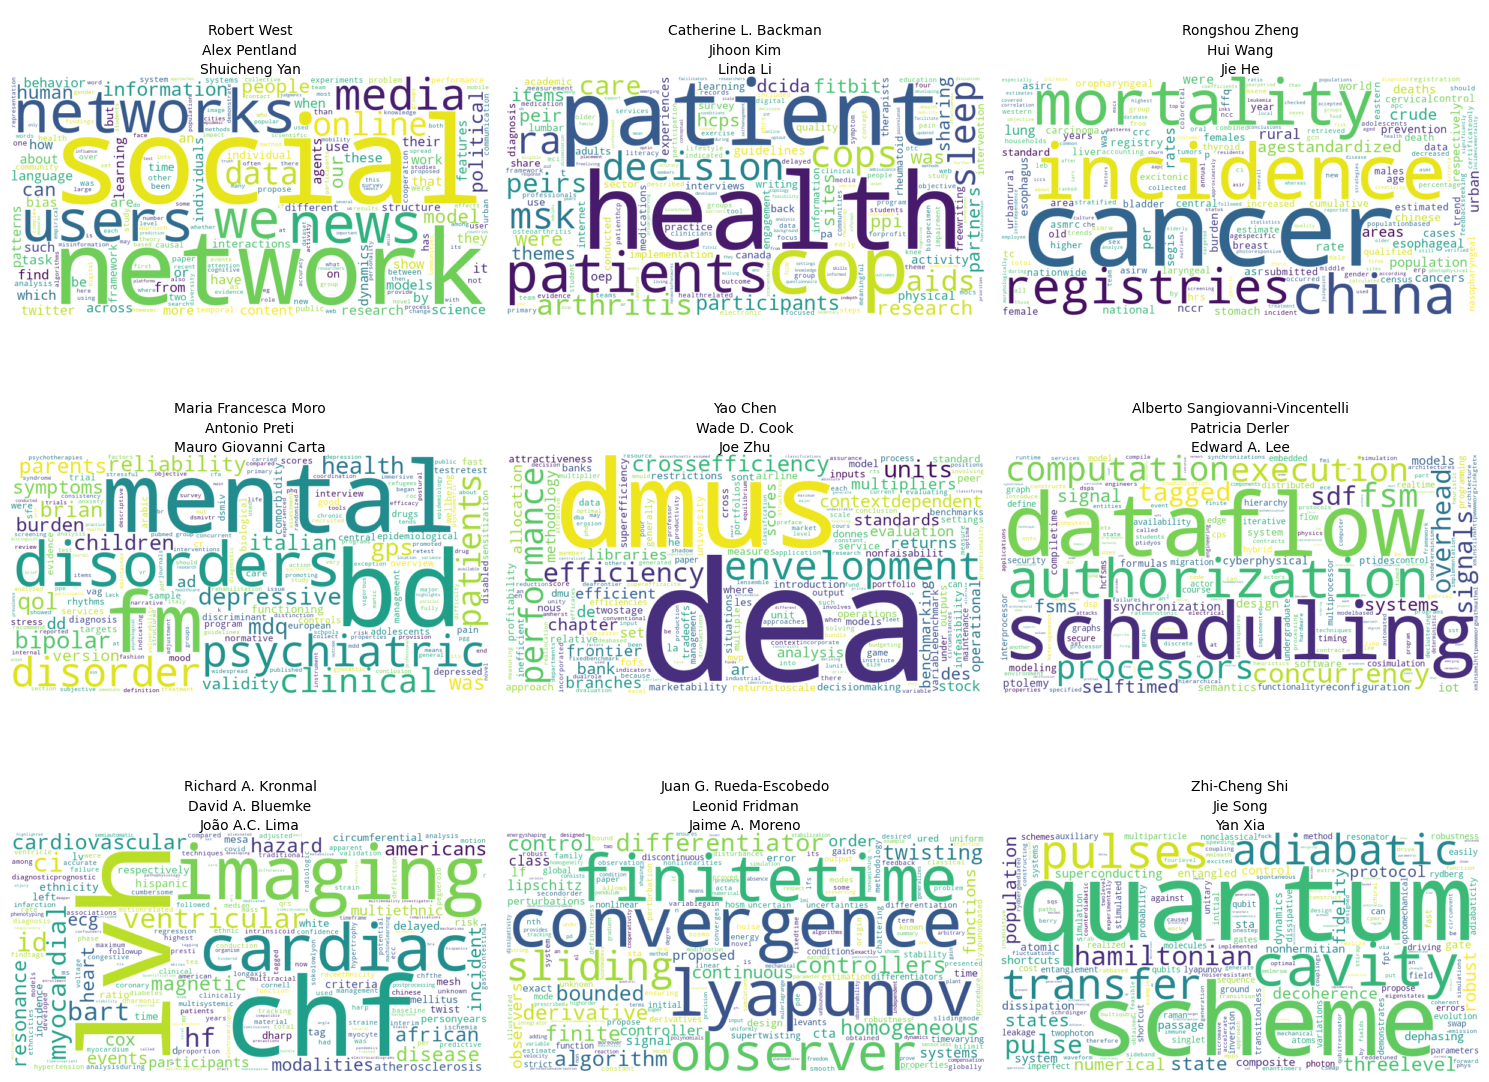

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(15, 12))  # Create a 3x3 grid of subplots

for i, (com, ax) in enumerate(zip(top_9_coms, axes.flatten())):
    words = com_words[com]  # Getting the wordlist for the given community
    TF = Counter(words)  # Creating dictionary of counts
    TF_IDF = Counter({word: TF[word] * IDF_dict[word] for word in words})
    
    # Create a word cloud
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(TF_IDF)
    
    topAuthors = [get_author_name(id) for id in get_highest_degree_authors(G, communities[com], 3)]
    
    # Plot the names at the top
    ax.text(0.5, 1.03, topAuthors[0], fontsize=10, ha='center', va='center', transform=ax.transAxes)
    ax.text(0.5, 1.11, topAuthors[1], fontsize=10, ha='center', va='center', transform=ax.transAxes)
    ax.text(0.5, 1.19, topAuthors[2], fontsize=10, ha='center', va='center', transform=ax.transAxes)
    ax.text(0.5, 1.25, " ", fontsize=10, ha='center', va='center', transform=ax.transAxes)

    # Display the word cloud
    ax.imshow(wordcloud, interpolation="bilinear")
    ax.axis("off")  # Hide axes

# Show all plots in a single figure
plt.tight_layout()
plt.show()

#### Commenting on the results

It seems like the first community, which is by far the biggest, is the most "core" computational social science group. Its most defining word include, social, network, users, information, news, twitter, which reflects the way of studying big data from the web to say something about a given research question. These research questions could be given by some of the less used words, which are still characteristic of the community, fx. patterns, behavior, model, which suggests that the research is in making models and finding patterns in peoples behavior - which is characteristic for social science.

The 8 smaller communities, with around 100 authors in each, definitely all have a focus each, the second-largest community having words like health, patients, arthritis as most defining word, suggest that the community is using data in the hospital/medical sector. The following communities each have their own theme, fx psycological disorders, quantum physics, mathematics and IT. 

These communities makes sense since we have chosen to include articles which have a computational topic combined with a social-science topic. 

#### Top authors

The top authors of the first (big) community are computer scientists, with focus on multimedia research and behavioral science, and all seems to be awarded or well known. This makes sense since these topics are core topics within computational social science.

In the smaller communities the top authors have proffesions correspnding to the theme of the words, fx in the second community, whith health related words, the top 3 authors are doctors or in biomedical research.

### Exercise 3: rewising understanding of computational social science

In week 1 our approach to computational social science, was ways to use big data to do some kind of research, mostly in behavioral or social science. 

That is mostly the understanding we have still. Our investigation of the papers and authors related to CSS have shown that data driven research, with some social focus is used widely in many areas, though some of the discovered fields, might be a bit out of scope for CSS. 

If we only considering the biggest community found in our research as the "true" social science community, it includes a little more then 10.000 scientists. 